# Homework 3: Random Variables and Their Distributions
***

**Name**:  Jake Maloney

***

This assignment is due on Moodle by **5pm on Friday March 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

### Work only 4 of the 5 problems below! Your choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
from scipy.special import comb
%matplotlib inline

### [25 points] Problem 1
***

Let $X$ be the lifespan (in years) of a BF Otterich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{15}{c x^3} & 1 \leq x \leq 15 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid PDF. 

**Solution:**
$$
P(1 <= X <= 15) = \int_{1}^{15}\frac{15}{cx^3} dx = 1
$$
The integral under the curve in the bounds 1 to 15 must have an area of 1
Evalulating the integral gives
$$
= \frac{-15}{2cx^2}\Big|_{1}^{15} = \frac{112}{15c} = 1 \rightarrow c = \frac{112}{15} \rightarrow c = 7.4667
$$
so the value of c is equal to 7.4667

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

**Solution:**

$$
F(y) = \int_{-\infty}^{a}f(x) dx \rightarrow \int_{1}^{15}\frac{15}{7.467} \times \frac{1}{x^3} dx \rightarrow \frac{15}{7.467} \times \frac{-1}{2x^2}\Big|_{1}^{15}
$$
Then we just need to put the resulting equation in terms of y to get
$$
F(y) = \frac{15}{7.467} \times \frac{-1}{2y^2}\Big|_{1}^{15}
$$


**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 5 years without failing. 

**Solution:**
We can use the cdf we calculated in the last problem to find the probability that a tire only lasts at most 5 years without failing.
$$
= \frac{15}{7.467} \times \frac{-1}{2x^2}\Big|_{1}^{5} = 0.9642
$$
P(Tire-Less-Than-5) = 0.9642

Once we have this we can subtract this value from the total probability that we know is 1 and we will be left with the probability that a single tire lasts longer than 5 years without failing.
$$
1-0.9642 = 0.0358
$$
P(Tire_+5_Years) = 0.0358

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $62.5\%$ of all tires will need to be replaced. In other words, determine the 62.5th percentile of the distribution of $X$. 

**Solution:**
Since we already know that the tires will take at least one year to wear out at a minimum and we know the output of the cdf(y) is equal to .625 we know that the upper bound of this cdf function is the year in which 62.5% of all tires will need to be replaced. With some algebra we can say:
$$
0.625 = \frac{15}{7.467} \times \frac{-1}{2x^2}\Big|_{1}^{y}
$$
Where y is equal to the year that the tires will need to be replaced. We can preform algebra on this statement to get:
$$
0.625 \times \frac{7.467}{15} = \frac{-1}{2y^2} + \frac{1}{2(1^2)} \rightarrow  \left(0.625 \times \frac{7.467}{15}\right)-\frac{1}{2} = \frac{-1}{2y^2}
$$
With a little more algebra we get:
$$
y = 2.30098 = \sqrt{\left(\left(0.625 \times \frac{7.467}{15}\right)-\frac{1}{2}\right) \times \frac{2}{-1}}
$$
So 62.5% of all the tires will wear out after about 2.3 years.

**Part E**: What is the probability that all four BF Otterich Rugged Trail T/A tires on a vehicle last longer than 5 years without failing? 

**Solution:**
Using the value we calculated in **Part C** we know the probability for a single tire to last longer than 5 years. If we take this value to the 4th power we are left with the probability that all four tires will last longer than 5 years.

$$
(0.0358)^4 = 1.64 \times 10^{-6}
$$
P(Tire_+5_Years) = $1.64 \times 10^{-6}$

### [25 points] Problem 2
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 10 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(10)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

**Solution: **
The possion distribution because you have the number of arrivals in a time period (a fixed day) and $\lambda$ is given as 10 and X is the number of boats that cross under the bridge.

**Part B**:  What is the probability that 8 boats cross under the bridge on a particular day?

**Solution: **
PMF of Poisson = $\frac{\lambda^k * e^{-\lambda}}{k!}$

$$
PMF = \frac{\lambda^k * e^{-\lambda}}{k!}
$$
Which if we imput our values is 
$$
PMF = \frac{10^8 * e^{-10}}{8!}
$$
So PMF = 0.1126

**Part C**:  What is the probability that 8 boats or fewer cross under the bridge on a particular day?

**Solution: **

$$
\sum\limits_{n=0}^{8}\frac{10^n * e^{-10}}{n!} = \frac{461843}{63\times e^{10}} = 0.333
$$

**Part D**: What is the probability that between 2 and 4 hours pass between two boat crossings? 

**Solution: **
 You must covert $\lambda$  from just boats to a rate of boats per hour because this question has to do with the rates of boat in a time frame. With the new $\lambda$ we can use the same equation to evalulate this probability.
 $$
 \lambda = \frac{10}{24}
 $$
 
 P(2-4 hours between boat crossing) = $\frac{e^{\frac{-10}{24}} \times \left(\frac{10}{24}\right)^{k}}{k!}$
 
 Which is equal to
 
 $$
 = \int_{2}^{4}\frac{e^{\frac{-10}{24}} \times \left(\frac{10}{24}\right)^{k}}{k!} = 0.0564
 $$
 So there is a 5.64% chance 2 to 4 hours will pass between two boat crossings.

**Part F**: Write a function boat_count that takes as its sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function. In other words, please keep the name of the function, its input parameter, and its desired output the same. Of course, the inner workings of this function and the actual value that it returns are in your hands!

In [2]:
def boat_count(lam):
    BoatA = np.random.exponential(lam)
    return 0

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 8 boats or fewer cross under the bridge on a particular day. For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function. 

In [3]:
def boat_count_sim(lam, num_days=int(1e3)):
    
    return 1.0 

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 2 and 4 hours apart.  For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  

In [4]:
def boat_time_sim(lam, num_boats=int(1e3)): 
    
    return 1.0 

### [25 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [5]:
def pmf_natural(x):
    if (x < 1 | x > 9):
        return 0
    else:
        n = (x+1)/x
        func = np.log10(n)
        #print(func)
        return func

In [6]:
#pmf_natural(5)

In [7]:
#for i in range (1, 10):
#    print(pmf_natural(i))

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

ValueError: not enough values to unpack (expected 2, got 0)

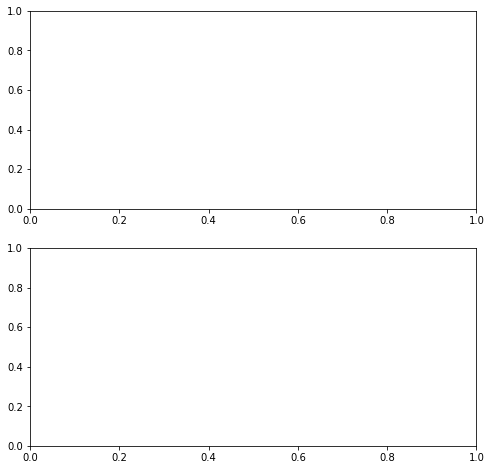

In [8]:
#2nd plot is just a constant of 1/9th
comstant = 1/9 #Value of the discrete uniform
pmf_nat_array = (0.301029995664, 0.176091259056, 0.124938736608, 0.0969100130081, 0.0791812460476, 0.0669467896306, 0.0579919469777, 0.0511525224474, 0.0457574905607)
# above array are the pmf values from 1 to 9

# making the space for two plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# Histogram for the pmf on the top

#Histogram for discrete uniform on the bottom

# Setting x and y axis to be the same
axes[0].set_xlim([])
axes[1].set_xlim([])
axes[0].set_ylim([])
axes[1].set_ylim([])

#making sure labels don't overlap
fig.subplots_adjust(hspace=.5)

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [ ]:
def cdf_natural(y):
    return 1.0  

**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

### [25 points] Problem 4
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


**Solution: **

In order to win the series at the 8th game you must win the series' 8th game. The number of possible winning combonations is 7 choose 5 which


p = 0.55


P(Win-Series-at-8) = ${7 \choose 5} \times (1-p)^(7-5) \times p^5 \times p
$


P(Win-Series-at-8) = 0.1177

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

**Solution: **

In order to win the series at the 8th game you must win the series' 8th game. The number of possible winning combonations is 7 choose 5 which

P(Win-Series) = $\sum\limits_{n=5}^{10} {n \choose k} \times (1-p)^(n-k) \times p^n \times p$

P(Win-Series) = 0.6331

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

**Solution: **

The best the series could go is you win the first 6 games so you would only need to pay Bob \$600 so you could take home In the very best case  \$9400.

P(Win-Series) = 0.9218

Expected Value = $ 9400 \times 0.9218 = 8604.92$

So the Expected payout for an 11-game series is 8604.92

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


**Solution: **
A short series would mean that your total payout would be greater than a longer series. A longer series would give you a higher probabilitity of winning overall at the expense of a lower total payout. As the series length increases will increase until the point where you've reacched the optimal series length (where the probability of winning the series is the highest while still having the highest expected payout). After that point the probability of winning the series but the expected payout will decrease.

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [ ]:
def exp_value(p, length):  #Function to calculate the expected value of the series length
    k = (length+1)/2
    P_Win = (comb(i, k, exact=False) * (p**(k))*((1-p)**(i-k)*p))
    Expec_Payout = P_Win *(10000-(100*k)) 
    return Expec_Payout# returning this because it will be used in the array.

In [ ]:
def optimal_series(p):
    for i in np.arange (3, 101, 2):
        Sarray = [49]
        for j in range(int(i/2)+1):
            
            Sarray[i] = exp_value(p, i)
    return Sarray

In [ ]:
optimal_series(5)

### [25 points] Problem 5
***

The card game "War" is fun for small children. The rules are [here](https://www.bicyclecards.com/how-to-play/war/). Assume that the value of each card in the deck, in decreasing order, is A K Q J 10 9 8 7 6 5 4 3 2. For example, Q is of higher value than J. 

Create a simulation of the game War. Your simulation must:

- initialize a single deck of 52 standard cards, shuffled.
- deal half of those cards to each player.
- simulate the game of War between two players until one player has all 52 cards, while recording the number of rounds that have passed.
- for counting purposes, a round ends when the winner places cards on the bottom of their stack. 
- if a player runs out of cards mid-War, that player loses. 
- arbitrarily decide that one player is first and another second so that when cards are placed on the bottom of the winner's stack, they remain in the order they were played.  

**Part A**: For any fixed order of the cards, the game is completely non-random. This means that shuffling the deck randomly makes the duration of the game a random variable. Use your simulation to compute the expected value of the duration of a game of war. 

**Part B**: What happens to the expected duration if the K, Q, and J cards are all now assumed to have _equal_ rank?

**Part C**: Suppose that before the game starts, Player 1 gives all of their 2s and 3s to Player 2, and Player 2 gives all their As and Ks to Player 1. Does this tend to make the game longer or shorter?